In [315]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [520]:
df = pd.read_csv("construction-set/benchmark.csv") 
df1 = pd.read_csv("construction-set-spf/benchmark.csv")

In [12]:
timecol = 'Solving time (s)'
numnodecol = 'Number of nodes'

In [198]:
df[timecol]

0      10.917553
1      64.861714
2      36.938093
3      55.146640
4      32.781513
5     106.835633
6     170.400794
7      73.466432
8      18.194386
9      15.752869
10    138.644187
11     36.962417
12     47.029744
13     12.781794
14     40.614638
15     22.078906
16      9.548763
17     67.368321
18      1.787736
19     67.141742
20     22.370454
21      7.853930
22     37.902562
23     10.550159
24     46.452884
25      5.562130
26     20.706832
27     14.586104
28     34.300107
29     87.390472
30     74.941127
31     11.570050
32     41.331209
33     27.892862
34     51.337024
35     40.522879
36     36.927615
37     31.088383
38      8.688432
39     42.973589
40      9.537738
41    167.317803
42     56.549889
43     69.623198
44     52.210738
45      9.917189
46    426.698503
47     35.388471
48     24.076392
49     19.526163
Name: Solving time (s), dtype: float64

In [237]:
model = LinearRegression()
X = np.array(df[numnodecol]).reshape(-1, 1)
y = np.array(df[timecol]).reshape(-1, 1)
model.fit(X, y)
y_pred = model.predict(X)
print(f"coefficient: {model.coef_[0][0]}")
print(f"intercept: {model.intercept_[0]}")
print(model.score(X, y))
print(f"R^2: {r2_score(y, y_pred)}")
print(f"RMSE: {mean_squared_error(y, y_pred)}")

coefficient: 0.047577813170299535
intercept: 2.3632150046085556
0.9932381691032245
R^2: 0.9932381691032245
RMSE: 28.8960328621763


In [228]:
model.coef_

array([[0.04757781]])

(0, 459.6961699842654)

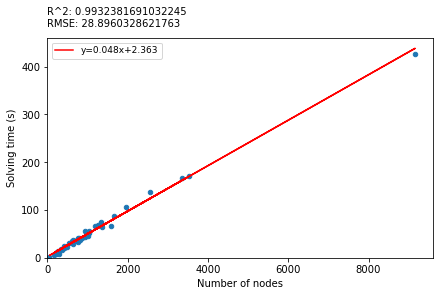

In [267]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111)
df.plot.scatter(y=timecol, x=numnodecol, ax=ax)
ax.plot(X, y_pred, 'r', label='y={:.3f}x+{:.3f}'.format(model.coef_[0][0],model.intercept_[0]))
plt.text(x = 0,
         y = 1,
         s =
         f"R^2: {r2_score(y, y_pred)}\n"
         f"RMSE: {mean_squared_error(y, y_pred)}\n",
         transform=ax.transAxes)
plt.legend(fontsize=9)
plt.xlim(0)
plt.ylim(0)
fig.savefig("construction-set-spf")

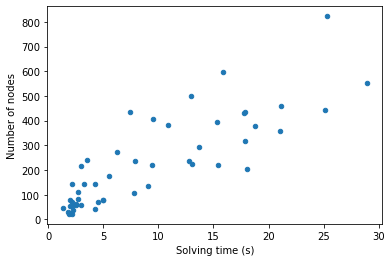

In [318]:
df1.plot.scatter(x=timecol, y=numnodecol)

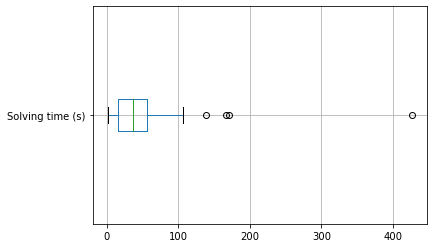

In [13]:
boxplot = df.boxplot(column=[timecol], vert=False)

In [7]:
df1 = pd.read_csv("construction-set-spf/benchmark.csv") 
df1

,Solving time (s),Number of nodes
0,2.745269,81
1,15.854128,598
2,9.099764,134
3,17.755315,429
4,2.253974,37
5,21.171370,459
6,15.433968,220
7,17.833907,434
8,2.565543,58
9,13.733407,293


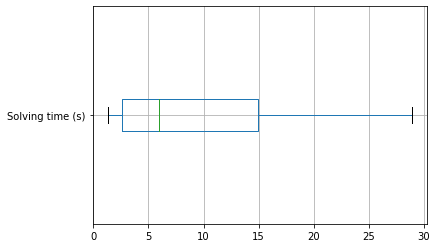

In [14]:
boxplot = df1.boxplot(column=[timecol], vert=False)

In [521]:
combined_df = pd.DataFrame(pd.concat([df, df1], axis=0, keys=["M-RRT", "SPF"]))
combined_df.index.set_names(["Algorithm", "Run"], inplace=True)
combined_df.reset_index(inplace=True)
combined_df

,Algorithm,Run,Solving time (s),Number of nodes
0,M-RRT,0,10.917553,208
1,M-RRT,1,64.861714,1361
2,M-RRT,2,36.938093,756
3,M-RRT,3,55.146640,1043
4,M-RRT,4,32.781513,753
...,...,...,...,...
95,SPF,45,18.013121,203
96,SPF,46,15.282588,394
97,SPF,47,2.544529,64
98,SPF,48,7.833507,108


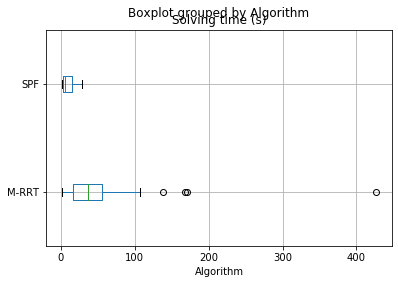

In [107]:
boxplot = combined_df.boxplot(column=[timecol], vert=False, by="Algorithm")

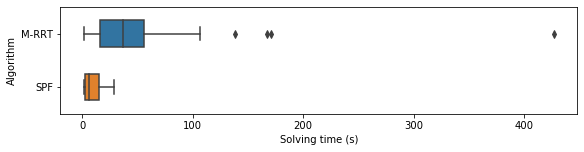

In [522]:
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, y = "Algorithm", x = timecol, orient="h", width=0.5,  ax=ax)
plt.show()
fig.savefig("construction-set-goalconfig-time.png", dpi=200)

In [290]:
print("M-RRT:")
print(combined_df[combined_df["Algorithm"]=="M-RRT"][timecol].describe().apply("{0:.2f}".format)
)
print()
print("SPF:")
print(combined_df[combined_df["Algorithm"]=="SPF"][timecol].describe().apply("{0:.2f}".format))

M-RRT:
count     50.00
mean      51.10
std       66.03
min        1.79
25%       16.36
50%       36.93
75%       56.20
max      426.70
Name: Solving time (s), dtype: object

SPF:
count    50.00
mean      9.06
std       7.54
min       1.32
25%       2.59
50%       5.92
75%      14.90
max      28.91
Name: Solving time (s), dtype: object


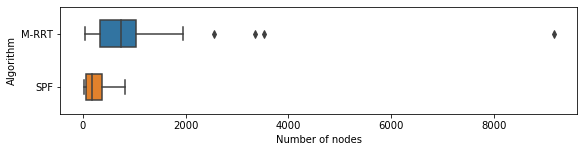

In [523]:
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, y = "Algorithm", x = numnodecol, orient="h", width=0.5, ax=ax)
plt.show()
fig.savefig("construction-set-goalconfig-numnode.png")

In [289]:
print("M-RRT:")
print(combined_df[combined_df["Algorithm"]=="M-RRT"][numnodecol].describe().apply("{0:.2f}".format))
print()
print("SPF:")
print(combined_df[combined_df["Algorithm"]=="SPF"][numnodecol].describe().apply("{0:.2f}".format))

M-RRT:
count      50.00
mean     1024.38
std      1383.24
min        54.00
25%       336.50
50%       740.00
75%      1040.75
max      9154.00
Name: Number of nodes, dtype: object

SPF:
count     50.00
mean     224.28
std      183.11
min       22.00
25%       71.25
50%      189.50
75%      374.25
max      823.00
Name: Number of nodes, dtype: object


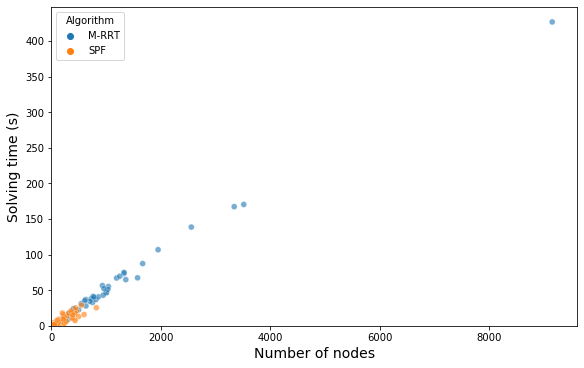

In [445]:
x_axis=numnodecol
y_axis=timecol

fig = plt.figure(figsize=(8,5), constrained_layout=True)
ax = fig.add_subplot(111)
sns.scatterplot(data = combined_df, x=x_axis, y=y_axis, 
                ax=ax, hue="Algorithm", alpha=0.6, legend="auto)
ax.set_xlabel(x_axis, fontsize=14)
ax.set_ylabel(y_axis, fontsize=14)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
plt.show()
fig.savefig("construction-set-goalconfig-scatter.png", dpi=200)

coefficient: 0.047577813170299535
intercept: 2.3632150046085556
0.9932381691032245
R^2: 0.9932381691032245
RMSE: 28.8960328621763


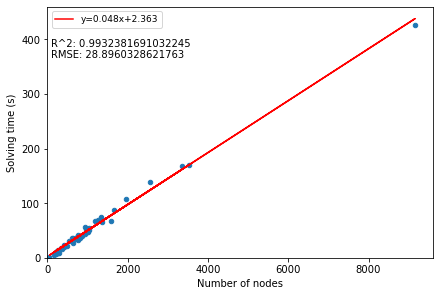

In [335]:
algorithm = "M-RRT"
df = combined_df[combined_df["Algorithm"] == algorithm]

model = LinearRegression()
X = np.array(df[numnodecol]).reshape(-1, 1)
y = np.array(df[timecol]).reshape(-1, 1)
model.fit(X, y)
y_pred = model.predict(X)
print(f"coefficient: {model.coef_[0][0]}")
print(f"intercept: {model.intercept_[0]}")
print(model.score(X, y))
print(f"R^2: {r2_score(y, y_pred)}")
print(f"RMSE: {mean_squared_error(y, y_pred)}")

fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111)
df.plot.scatter(y=timecol, x=numnodecol, ax=ax)
ax.plot(X, y_pred, 'r', label='y={:.3f}x+{:.3f}'.format(model.coef_[0][0],model.intercept_[0]))
plt.text(x = 0.01,
         y = 0.75,
         s =
         f"R^2: {r2_score(y, y_pred)}\n"
         f"RMSE: {mean_squared_error(y, y_pred)}\n",
         transform=ax.transAxes)
plt.legend(fontsize=9)
plt.xlim(0)
plt.ylim(0)
fig.savefig(f"construction-set-{algorithm}-numnode-vs-time.png", dpi=200)

coefficient: 0.03457586358149627
intercept: 1.302809275942015
0.7043834957984239
R^2: 0.7043834957984239
RMSE: 16.486377035309424


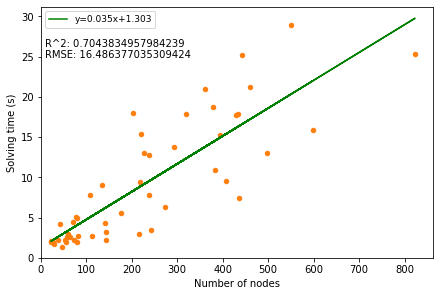

In [334]:
algorithm = "SPF"
df = combined_df[combined_df["Algorithm"] == algorithm]

model = LinearRegression()
X = np.array(df[numnodecol]).reshape(-1, 1)
y = np.array(df[timecol]).reshape(-1, 1)
model.fit(X, y)
y_pred = model.predict(X)
print(f"coefficient: {model.coef_[0][0]}")
print(f"intercept: {model.intercept_[0]}")
print(model.score(X, y))
print(f"R^2: {r2_score(y, y_pred)}")
print(f"RMSE: {mean_squared_error(y, y_pred)}")

fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111)
df.plot.scatter(y=timecol, x=numnodecol, ax=ax, c="tab:orange")
ax.plot(X, y_pred, 'g', label='y={:.3f}x+{:.3f}'.format(model.coef_[0][0],model.intercept_[0]))
plt.text(x = 0.01,
         y = 0.75,
         s =
         f"R^2: {r2_score(y, y_pred)}\n"
         f"RMSE: {mean_squared_error(y, y_pred)}\n",
         transform=ax.transAxes)
plt.legend(fontsize=9)
plt.xlim(0)
plt.ylim(0)
fig.savefig(f"construction-set-{algorithm}-numnode-vs-time.png", dpi=200)

# Construction-set: Goal constraint

In [299]:
combined_df = pd.read_csv("construction-set-spf/benchmark_goalconstraint.csv")

In [303]:
print(combined_df[timecol].describe().apply("{0:.2f}".format))
print(combined_df[numnodecol].describe().apply("{0:.2f}".format))

count    50.00
mean      4.59
std       4.85
min       0.26
25%       1.19
50%       2.38
75%       7.11
max      21.57
Name: Solving time (s), dtype: object
count     50.00
mean     191.52
std      175.50
min       21.00
25%       71.50
50%      124.00
75%      265.25
max      880.00
Name: Number of nodes, dtype: object


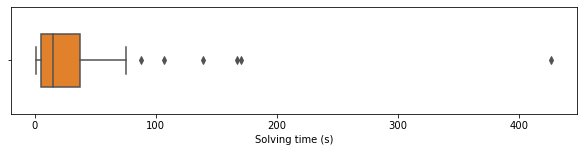

In [530]:
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, x = timecol, orient="h", width=0.5, color='tab:orange', ax=ax)
plt.show()
fig.savefig("construction-set-goalconstraint-time.png", dpi=200)

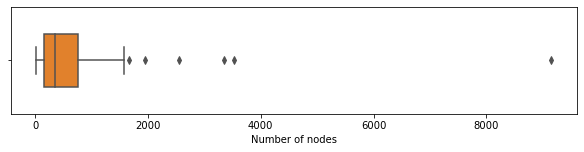

In [529]:
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, x = numnodecol, orient="h", width=0.5, color='tab:orange', ax=ax)
plt.show()
fig.savefig("construction-set-goalconstraint-numnode.png", dpi=200)

# romeo-placard

In [531]:
benchmark = "romeo-placard"
df = pd.read_csv(f"{benchmark}/benchmark.csv") 
df1 = pd.read_csv(f"{benchmark}-spf/benchmark.csv")

combined_df = pd.DataFrame(pd.concat([df, df1], axis=0, keys=["M-RRT", "SPF"]))
combined_df.index.set_names(["Algorithm", "Run"], inplace=True)
combined_df.reset_index(inplace=True)
combined_df

,Algorithm,Run,Solving time (s),Number of nodes
0,M-RRT,0,31.660427,181
1,M-RRT,1,193.305045,916
2,M-RRT,2,57.182720,293
3,M-RRT,3,122.812863,508
4,M-RRT,4,329.811699,1840
...,...,...,...,...
95,SPF,45,1.629739,30
96,SPF,46,0.639206,12
97,SPF,47,2.261414,27
98,SPF,48,4.419863,52


In [451]:
print("M-RRT:")
print(combined_df[combined_df["Algorithm"]=="M-RRT"][timecol].describe().apply("{0:.2f}".format))
print()
print("SPF:")
print(combined_df[combined_df["Algorithm"]=="SPF"][timecol].describe().apply("{0:.2f}".format))

M-RRT:
count     50.00
mean     133.57
std       92.95
min        2.77
25%       61.97
50%      115.03
75%      190.94
max      378.31
Name: Solving time (s), dtype: object

SPF:
count    50.00
mean      4.98
std       4.55
min       0.64
25%       2.14
50%       3.32
75%       5.99
max      19.88
Name: Solving time (s), dtype: object


In [452]:
print("M-RRT:")
print(combined_df[combined_df["Algorithm"]=="M-RRT"][numnodecol].describe().apply("{0:.2f}".format))
print()
print("SPF:")
print(combined_df[combined_df["Algorithm"]=="SPF"][numnodecol].describe().apply("{0:.2f}".format))

M-RRT:
count      50.00
mean      644.80
std       464.78
min        21.00
25%       291.50
50%       510.00
75%       960.50
max      1840.00
Name: Number of nodes, dtype: object

SPF:
count     50.00
mean      48.22
std       34.35
min       12.00
25%       26.00
50%       36.50
75%       56.50
max      148.00
Name: Number of nodes, dtype: object


In [453]:
mrrt = combined_df[combined_df["Algorithm"]=="M-RRT"][numnodecol].describe()
mrrt_minnode = "{:.2f}".format(mrrt.loc["min"])
mrrt_mednode = "{:.2f}".format(mrrt.loc["50%"])
mrrt_maxnode = "{:.2f}".format(mrrt.loc["max"])

spf = combined_df[combined_df["Algorithm"]=="SPF"][numnodecol].describe()
spf_minnode = "{:.2f}".format(spf.loc["min"])
spf_mednode = "{:.2f}".format(spf.loc["50%"])
spf_maxnode = "{:.2f}".format(spf.loc["max"])

mrrt = combined_df[combined_df["Algorithm"]=="M-RRT"][timecol].describe()
mrrt_mintime = "{:.2f}".format(mrrt.loc["min"])
mrrt_medtime = "{:.2f}".format(mrrt.loc["50%"])
mrrt_maxtime = "{:.2f}".format(mrrt.loc["max"])

spf = combined_df[combined_df["Algorithm"]=="SPF"][timecol].describe()
spf_mintime = "{:.2f}".format(spf.loc["min"])
spf_medtime = "{:.2f}".format(spf.loc["50%"])
spf_maxtime = "{:.2f}".format(spf.loc["max"])

mrrt_success = mrrt.loc["count"]/50*100
spf_success = spf.loc["count"]/50*100

nodecolor = "red" if float(mrrt_mednode) < float(spf_mednode) else "teal"
timecolor = "red" if float(mrrt_medtime) < float(spf_medtime) else "teal"
successcolor = "red" if float(mrrt_success) < float(spf_success) else "black"

print("\\begin{table}\n"+
"  \\begin{tabular}{l|ccc|ccc|l}\n"+
"    \hline\n"+
"    \multirow{2}{5em}{Algorithm} & \multicolumn{3}{c|}{Solving time (s)} & \multicolumn{3}{c|}{Number of nodes} & \multirow{2}{5em} {Success \%} \\\\\n"+
"    & Min & Median & Max & Min & Median & Max & \\\\ \n"+
"    \hline\n"+
f"    M-RRT & {mrrt_mintime} & {mrrt_medtime} & {mrrt_maxtime} & {mrrt_minnode} & {mrrt_mednode} & {mrrt_maxnode} & \\textcolor{{{successcolor}}}{{{mrrt_success}}} \\\\\n"+
"    \hline\n"+
f"    SPF & {spf_mintime} & \\textcolor{{{timecolor}}}{{{spf_medtime}}} & {spf_maxtime} & {spf_minnode} & \\textcolor{{{nodecolor}}}{{{spf_mednode}}} & {spf_maxnode} & {spf_success} \\\\\n"+
"    \hline\n"+
"  \end{tabular}\n"+
"\end{table}")

\begin{table}
  \begin{tabular}{l|ccc|ccc|l}
    \hline
    \multirow{2}{5em}{Algorithm} & \multicolumn{3}{c|}{Solving time (s)} & \multicolumn{3}{c|}{Number of nodes} & \multirow{2}{5em} {Success \%} \\
    & Min & Median & Max & Min & Median & Max & \\ 
    \hline
    M-RRT & 2.77 & 115.03 & 378.31 & 21.00 & 510.00 & 1840.00 & \textcolor{black}{100.0} \\
    \hline
    SPF & 0.64 & \textcolor{teal}{3.32} & 19.88 & 12.00 & \textcolor{teal}{36.50} & 148.00 & 100.0 \\
    \hline
  \end{tabular}
\end{table}


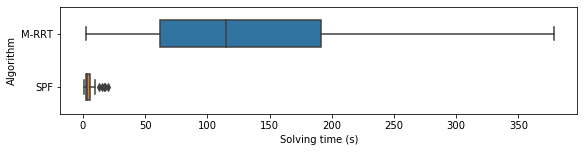

In [533]:
benchmark = "romeo-placard"
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, y = "Algorithm", x = timecol, orient="h", width=0.5,  ax=ax)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-time.png", dpi=200)

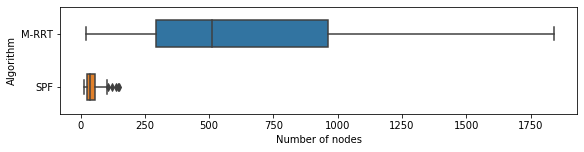

In [534]:
benchmark = "romeo-placard"
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, y = "Algorithm", x = numnodecol, orient="h", width=0.5, ax=ax)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-numnode.png", dpi=200)

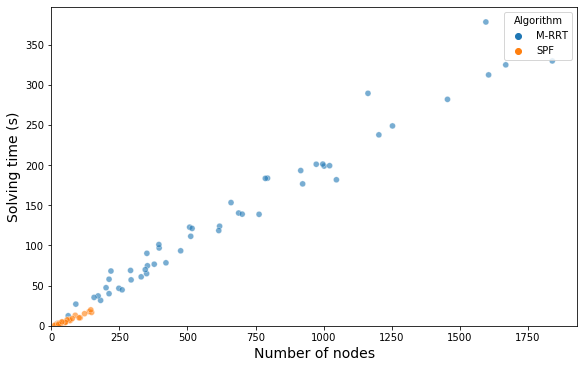

In [456]:
benchmark = "romeo-placard"
x_axis=numnodecol
y_axis=timecol

fig = plt.figure(figsize=(8,5), constrained_layout=True)
ax = fig.add_subplot(111)
sns.scatterplot(data = combined_df, x=x_axis, y=y_axis, 
                ax=ax, hue="Algorithm", alpha=0.6, legend="auto")
ax.set_xlabel(x_axis, fontsize=14)
ax.set_ylabel(y_axis, fontsize=14)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-scatter.png", dpi=200)

# pr2-manipulation-kitchen

In [535]:
benchmark = "pr2-manipulation-kitchen"
df = pd.read_csv(f"{benchmark}/benchmark.csv") 
df1 = pd.read_csv(f"{benchmark}-spf/benchmark.csv")

combined_df = pd.DataFrame(pd.concat([df, df1], axis=0, keys=["M-RRT", "SPF"]))
combined_df.index.set_names(["Algorithm", "Run"], inplace=True)
combined_df.reset_index(inplace=True)
combined_df

,Algorithm,Run,Solving time (s),Number of nodes
0,M-RRT,0,12.981094,63
1,M-RRT,1,12.993660,123
2,M-RRT,2,48.726623,330
3,M-RRT,3,76.021873,425
4,M-RRT,4,24.057905,123
...,...,...,...,...
95,SPF,45,30.622512,597
96,SPF,46,173.146730,1206
97,SPF,47,56.888971,567
98,SPF,48,208.734737,764


In [458]:
print("M-RRT:")
print(combined_df[combined_df["Algorithm"]=="M-RRT"][timecol].describe().apply("{0:.2f}".format))
print()
print("SPF:")
print(combined_df[combined_df["Algorithm"]=="SPF"][timecol].describe().apply("{0:.2f}".format))

M-RRT:
count    50.00
mean     32.77
std      20.60
min       8.57
25%      19.36
50%      26.24
75%      40.69
max      97.38
Name: Solving time (s), dtype: object

SPF:
count     50.00
mean      32.03
std       43.19
min        3.15
25%        9.79
50%       16.03
75%       30.24
max      208.73
Name: Solving time (s), dtype: object


In [459]:
print("M-RRT:")
print(combined_df[combined_df["Algorithm"]=="M-RRT"][numnodecol].describe().apply("{0:.2f}".format))
print()
print("SPF:")
print(combined_df[combined_df["Algorithm"]=="SPF"][numnodecol].describe().apply("{0:.2f}".format))

M-RRT:
count     50.00
mean     190.16
std      106.09
min       20.00
25%      113.00
50%      161.50
75%      245.50
max      458.00
Name: Number of nodes, dtype: object

SPF:
count      50.00
mean      288.08
std       284.05
min        20.00
25%       117.00
50%       174.00
75%       357.00
max      1239.00
Name: Number of nodes, dtype: object


In [460]:
mrrt = combined_df[combined_df["Algorithm"]=="M-RRT"][numnodecol].describe()
mrrt_minnode = "{:.2f}".format(mrrt.loc["min"])
mrrt_mednode = "{:.2f}".format(mrrt.loc["50%"])
mrrt_maxnode = "{:.2f}".format(mrrt.loc["max"])

spf = combined_df[combined_df["Algorithm"]=="SPF"][numnodecol].describe()
spf_minnode = "{:.2f}".format(spf.loc["min"])
spf_mednode = "{:.2f}".format(spf.loc["50%"])
spf_maxnode = "{:.2f}".format(spf.loc["max"])

mrrt = combined_df[combined_df["Algorithm"]=="M-RRT"][timecol].describe()
mrrt_mintime = "{:.2f}".format(mrrt.loc["min"])
mrrt_medtime = "{:.2f}".format(mrrt.loc["50%"])
mrrt_maxtime = "{:.2f}".format(mrrt.loc["max"])

spf = combined_df[combined_df["Algorithm"]=="SPF"][timecol].describe()
spf_mintime = "{:.2f}".format(spf.loc["min"])
spf_medtime = "{:.2f}".format(spf.loc["50%"])
spf_maxtime = "{:.2f}".format(spf.loc["max"])

mrrt_success = mrrt.loc["count"]/50*100
spf_success = spf.loc["count"]/50*100

nodecolor = "red" if float(mrrt_mednode) < float(spf_mednode) else "teal"
timecolor = "red" if float(mrrt_medtime) < float(spf_medtime) else "teal"
successcolor = "red" if float(mrrt_success) < float(spf_success) else "black"

print("\\begin{table}\n"+
"  \\begin{tabular}{l|ccc|ccc|l}\n"+
"    \hline\n"+
"    \multirow{2}{5em}{Algorithm} & \multicolumn{3}{c|}{Solving time (s)} & \multicolumn{3}{c|}{Number of nodes} & \multirow{2}{5em} {Success \%} \\\\\n"+
"    & Min & Median & Max & Min & Median & Max & \\\\ \n"+
"    \hline\n"+
f"    M-RRT & {mrrt_mintime} & {mrrt_medtime} & {mrrt_maxtime} & {mrrt_minnode} & {mrrt_mednode} & {mrrt_maxnode} & \\textcolor{{{successcolor}}}{{{mrrt_success}}} \\\\\n"+
"    \hline\n"+
f"    SPF & {spf_mintime} & \\textcolor{{{timecolor}}}{{{spf_medtime}}} & {spf_maxtime} & {spf_minnode} & \\textcolor{{{nodecolor}}}{{{spf_mednode}}} & {spf_maxnode} & {spf_success} \\\\\n"+
"    \hline\n"+
"  \end{tabular}\n"+
"\end{table}")

\begin{table}
  \begin{tabular}{l|ccc|ccc|l}
    \hline
    \multirow{2}{5em}{Algorithm} & \multicolumn{3}{c|}{Solving time (s)} & \multicolumn{3}{c|}{Number of nodes} & \multirow{2}{5em} {Success \%} \\
    & Min & Median & Max & Min & Median & Max & \\ 
    \hline
    M-RRT & 8.57 & 26.24 & 97.38 & 20.00 & 161.50 & 458.00 & \textcolor{black}{100.0} \\
    \hline
    SPF & 3.15 & \textcolor{teal}{16.03} & 208.73 & 20.00 & \textcolor{red}{174.00} & 1239.00 & 100.0 \\
    \hline
  \end{tabular}
\end{table}


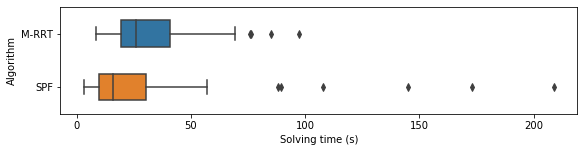

In [537]:
benchmark = "pr2-manipulation-kitchen"
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, y = "Algorithm", x = timecol, orient="h", width=0.5, ax=ax)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-time.png", dpi=200)

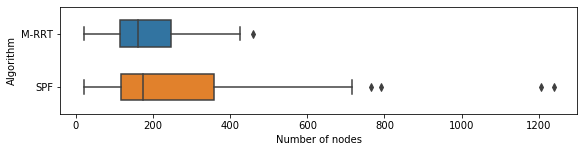

In [539]:
benchmark = "pr2-manipulation-kitchen"
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, y = "Algorithm", x = numnodecol, orient="h", width=0.5, ax=ax)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-numnode.png", dpi=200)

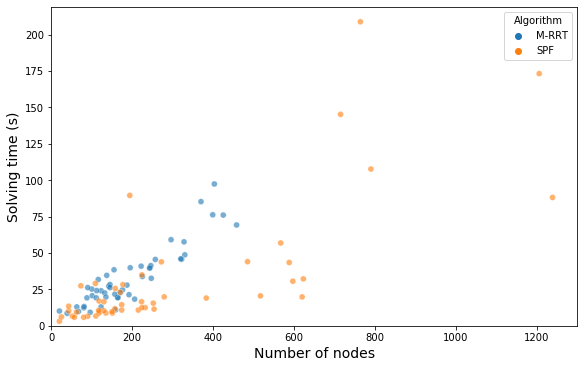

In [463]:
benchmark = "pr2-manipulation-kitchen"
x_axis=numnodecol
y_axis=timecol

fig = plt.figure(figsize=(8,5), constrained_layout=True)
ax = fig.add_subplot(111)
sns.scatterplot(data = combined_df, x=x_axis, y=y_axis, 
                ax=ax, hue="Algorithm", alpha=0.6, legend="auto")
ax.set_xlabel(x_axis, fontsize=14)
ax.set_ylabel(y_axis, fontsize=14)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-scatter.png", dpi=200)

# pr2-manipulation-two-hand

In [540]:
benchmark = "pr2-manipulation-two-hand"
df = pd.read_csv(f"{benchmark}/benchmark.csv") 
df1 = pd.read_csv(f"{benchmark}-spf/benchmark.csv")

combined_df = pd.DataFrame(pd.concat([df, df1], axis=0, keys=["M-RRT", "SPF"]))
combined_df.index.set_names(["Algorithm", "Run"], inplace=True)
combined_df.reset_index(inplace=True)
combined_df

,Algorithm,Run,Solving time (s),Number of nodes
0,M-RRT,0,2.616992,38
1,M-RRT,1,3.853612,23
2,M-RRT,2,2.578061,16
3,M-RRT,3,6.155028,28
4,M-RRT,4,7.030499,82
...,...,...,...,...
95,SPF,45,43.832939,223
96,SPF,46,27.714778,11
97,SPF,47,37.144417,125
98,SPF,48,39.338930,50


In [465]:
print("M-RRT:")
print(combined_df[combined_df["Algorithm"]=="M-RRT"][timecol].describe().apply("{0:.2f}".format))
print()
print("SPF:")
print(combined_df[combined_df["Algorithm"]=="SPF"][timecol].describe().apply("{0:.2f}".format))

M-RRT:
count    50.00
mean     12.37
std       9.62
min       1.60
25%       5.64
50%       9.34
75%      17.16
max      42.90
Name: Solving time (s), dtype: object

SPF:
count    50.00
mean     39.11
std      12.48
min      23.32
25%      29.09
50%      37.27
75%      45.61
max      78.80
Name: Solving time (s), dtype: object


In [466]:
print("M-RRT:")
print(combined_df[combined_df["Algorithm"]=="M-RRT"][numnodecol].describe().apply("{0:.2f}".format))
print()
print("SPF:")
print(combined_df[combined_df["Algorithm"]=="SPF"][numnodecol].describe().apply("{0:.2f}".format))

M-RRT:
count     50.00
mean      54.34
std       44.60
min        6.00
25%       23.25
50%       41.50
75%       72.50
max      225.00
Name: Number of nodes, dtype: object

SPF:
count     50.00
mean     132.44
std      124.23
min       11.00
25%       36.50
50%       73.50
75%      213.25
max      525.00
Name: Number of nodes, dtype: object


In [467]:
mrrt = combined_df[combined_df["Algorithm"]=="M-RRT"][numnodecol].describe()
mrrt_minnode = "{:.2f}".format(mrrt.loc["min"])
mrrt_mednode = "{:.2f}".format(mrrt.loc["50%"])
mrrt_maxnode = "{:.2f}".format(mrrt.loc["max"])

spf = combined_df[combined_df["Algorithm"]=="SPF"][numnodecol].describe()
spf_minnode = "{:.2f}".format(spf.loc["min"])
spf_mednode = "{:.2f}".format(spf.loc["50%"])
spf_maxnode = "{:.2f}".format(spf.loc["max"])

mrrt = combined_df[combined_df["Algorithm"]=="M-RRT"][timecol].describe()
mrrt_mintime = "{:.2f}".format(mrrt.loc["min"])
mrrt_medtime = "{:.2f}".format(mrrt.loc["50%"])
mrrt_maxtime = "{:.2f}".format(mrrt.loc["max"])

spf = combined_df[combined_df["Algorithm"]=="SPF"][timecol].describe()
spf_mintime = "{:.2f}".format(spf.loc["min"])
spf_medtime = "{:.2f}".format(spf.loc["50%"])
spf_maxtime = "{:.2f}".format(spf.loc["max"])

mrrt_success = mrrt.loc["count"]/50*100
spf_success = spf.loc["count"]/50*100

nodecolor = "red" if float(mrrt_mednode) < float(spf_mednode) else "teal"
timecolor = "red" if float(mrrt_medtime) < float(spf_medtime) else "teal"
successcolor = "red" if float(mrrt_success) < float(spf_success) else "black"

print("\\begin{table}\n"+
"  \\begin{tabular}{l|ccc|ccc|l}\n"+
"    \hline\n"+
"    \multirow{2}{5em}{Algorithm} & \multicolumn{3}{c|}{Solving time (s)} & \multicolumn{3}{c|}{Number of nodes} & \multirow{2}{5em} {Success \%} \\\\\n"+
"    & Min & Median & Max & Min & Median & Max & \\\\ \n"+
"    \hline\n"+
f"    M-RRT & {mrrt_mintime} & {mrrt_medtime} & {mrrt_maxtime} & {mrrt_minnode} & {mrrt_mednode} & {mrrt_maxnode} & \\textcolor{{{successcolor}}}{{{mrrt_success}}} \\\\\n"+
"    \hline\n"+
f"    SPF & {spf_mintime} & \\textcolor{{{timecolor}}}{{{spf_medtime}}} & {spf_maxtime} & {spf_minnode} & \\textcolor{{{nodecolor}}}{{{spf_mednode}}} & {spf_maxnode} & {spf_success} \\\\\n"+
"    \hline\n"+
"  \end{tabular}\n"+
"\end{table}")

\begin{table}
  \begin{tabular}{l|ccc|ccc|l}
    \hline
    \multirow{2}{5em}{Algorithm} & \multicolumn{3}{c|}{Solving time (s)} & \multicolumn{3}{c|}{Number of nodes} & \multirow{2}{5em} {Success \%} \\
    & Min & Median & Max & Min & Median & Max & \\ 
    \hline
    M-RRT & 1.60 & 9.34 & 42.90 & 6.00 & 41.50 & 225.00 & \textcolor{black}{100.0} \\
    \hline
    SPF & 23.32 & \textcolor{red}{37.27} & 78.80 & 11.00 & \textcolor{red}{73.50} & 525.00 & 100.0 \\
    \hline
  \end{tabular}
\end{table}


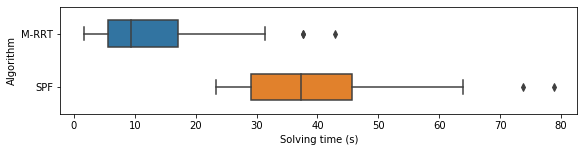

In [541]:
benchmark = "pr2-manipulation-two-hand"
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, y = "Algorithm", x = timecol, orient="h", width=0.5, ax=ax)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-time.png", dpi=200)

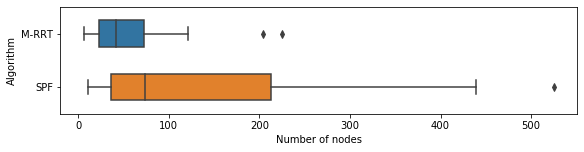

In [542]:
benchmark = "pr2-manipulation-two-hand"
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, y = "Algorithm", x = numnodecol, orient="h", width=0.5, ax=ax)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-numnode.png", dpi=200)

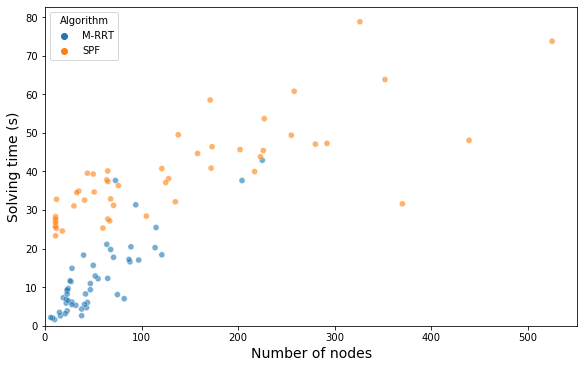

In [470]:
benchmark = "pr2-manipulation-two-hand"
x_axis=numnodecol
y_axis=timecol

fig = plt.figure(figsize=(8,5), constrained_layout=True)
ax = fig.add_subplot(111)
sns.scatterplot(data = combined_df, x=x_axis, y=y_axis, 
                ax=ax, hue="Algorithm", alpha=0.6, legend="auto")
ax.set_xlabel(x_axis, fontsize=14)
ax.set_ylabel(y_axis, fontsize=14)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-scatter.png", dpi=200)

# baxter-manipulation-boxes

In [543]:
benchmark = "baxter-manipulation-boxes"
df = pd.read_csv(f"{benchmark}/benchmark_correctgraph.csv") 
df1 = pd.read_csv(f"{benchmark}-spf/benchmark.csv")

combined_df = pd.DataFrame(pd.concat([df, df1], axis=0, keys=["M-RRT", "SPF"]))
combined_df.index.set_names(["Algorithm", "Run"], inplace=True)
combined_df.reset_index(inplace=True)
combined_df

,Algorithm,Run,Solving time (s),Number of nodes
0,M-RRT,0,0.962232,35
1,M-RRT,1,0.393035,23
2,M-RRT,2,1.455617,83
3,M-RRT,3,5.911366,234
4,M-RRT,4,2.016348,80
...,...,...,...,...
95,SPF,45,0.649446,92
96,SPF,46,0.768233,41
97,SPF,47,0.729041,38
98,SPF,48,0.520220,23


In [472]:
print("M-RRT:")
print(combined_df[combined_df["Algorithm"]=="M-RRT"][timecol].describe().apply("{0:.2f}".format))
print()
print("SPF:")
print(combined_df[combined_df["Algorithm"]=="SPF"][timecol].describe().apply("{0:.2f}".format))

M-RRT:
count    50.00
mean      1.88
std       1.37
min       0.39
25%       0.89
50%       1.70
75%       2.20
max       5.91
Name: Solving time (s), dtype: object

SPF:
count    50.00
mean      0.80
std       0.45
min       0.35
25%       0.47
50%       0.73
75%       0.92
max       2.61
Name: Solving time (s), dtype: object


In [473]:
print("M-RRT:")
print(combined_df[combined_df["Algorithm"]=="M-RRT"][numnodecol].describe().apply("{0:.2f}".format))
print()
print("SPF:")
print(combined_df[combined_df["Algorithm"]=="SPF"][numnodecol].describe().apply("{0:.2f}".format))

M-RRT:
count     50.00
mean      72.24
std       47.68
min       17.00
25%       35.25
50%       65.50
75%       82.50
max      234.00
Name: Number of nodes, dtype: object

SPF:
count     50.00
mean      76.02
std       84.37
min       15.00
25%       24.25
50%       56.00
75%       85.50
max      452.00
Name: Number of nodes, dtype: object


In [474]:
mrrt = combined_df[combined_df["Algorithm"]=="M-RRT"][numnodecol].describe()
mrrt_minnode = "{:.2f}".format(mrrt.loc["min"])
mrrt_mednode = "{:.2f}".format(mrrt.loc["50%"])
mrrt_maxnode = "{:.2f}".format(mrrt.loc["max"])

spf = combined_df[combined_df["Algorithm"]=="SPF"][numnodecol].describe()
spf_minnode = "{:.2f}".format(spf.loc["min"])
spf_mednode = "{:.2f}".format(spf.loc["50%"])
spf_maxnode = "{:.2f}".format(spf.loc["max"])

mrrt = combined_df[combined_df["Algorithm"]=="M-RRT"][timecol].describe()
mrrt_mintime = "{:.2f}".format(mrrt.loc["min"])
mrrt_medtime = "{:.2f}".format(mrrt.loc["50%"])
mrrt_maxtime = "{:.2f}".format(mrrt.loc["max"])

spf = combined_df[combined_df["Algorithm"]=="SPF"][timecol].describe()
spf_mintime = "{:.2f}".format(spf.loc["min"])
spf_medtime = "{:.2f}".format(spf.loc["50%"])
spf_maxtime = "{:.2f}".format(spf.loc["max"])

mrrt_success = mrrt.loc["count"]/50*100
spf_success = spf.loc["count"]/50*100

nodecolor = "red" if float(mrrt_mednode) < float(spf_mednode) else "teal"
timecolor = "red" if float(mrrt_medtime) < float(spf_medtime) else "teal"
successcolor = "red" if float(mrrt_success) < float(spf_success) else "black"

print(benchmark)
print("\\begin{table}\n"+
"  \\begin{tabular}{l|ccc|ccc|l}\n"+
"    \hline\n"+
"    \multirow{2}{5em}{Algorithm} & \multicolumn{3}{c|}{Solving time (s)} & \multicolumn{3}{c|}{Number of nodes} & \multirow{2}{5em} {Success \%} \\\\\n"+
"    & Min & Median & Max & Min & Median & Max & \\\\ \n"+
"    \hline\n"+
f"    M-RRT & {mrrt_mintime} & {mrrt_medtime} & {mrrt_maxtime} & {mrrt_minnode} & {mrrt_mednode} & {mrrt_maxnode} & \\textcolor{{{successcolor}}}{{{mrrt_success}}} \\\\\n"+
"    \hline\n"+
f"    SPF & {spf_mintime} & \\textcolor{{{timecolor}}}{{{spf_medtime}}} & {spf_maxtime} & {spf_minnode} & \\textcolor{{{nodecolor}}}{{{spf_mednode}}} & {spf_maxnode} & {spf_success} \\\\\n"+
"    \hline\n"+
"  \end{tabular}\n"+
"\end{table}")

\begin{table}
  \begin{tabular}{l|ccc|ccc|l}
    \hline
    \multirow{2}{5em}{Algorithm} & \multicolumn{3}{c|}{Solving time (s)} & \multicolumn{3}{c|}{Number of nodes} & \multirow{2}{5em} {Success \%} \\
    & Min & Median & Max & Min & Median & Max & \\ 
    \hline
    M-RRT & 0.39 & 1.70 & 5.91 & 17.00 & 65.50 & 234.00 & \textcolor{black}{100.0} \\
    \hline
    SPF & 0.35 & \textcolor{teal}{0.73} & 2.61 & 15.00 & \textcolor{teal}{56.00} & 452.00 & 100.0 \\
    \hline
  \end{tabular}
\end{table}


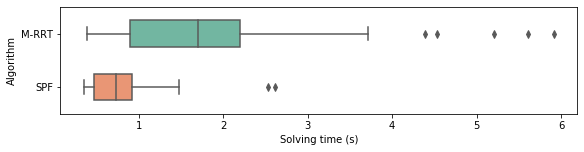

In [475]:
benchmark = "baxter-manipulation-boxes"
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, y = "Algorithm", x = timecol, orient="h", width=0.5, palette="Set2", ax=ax)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-time.png", dpi=200)

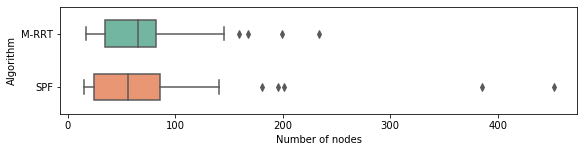

In [476]:
benchmark = "baxter-manipulation-boxes"
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, y = "Algorithm", x = numnodecol, orient="h", width=0.5, palette="Set2", ax=ax)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-numnode.png", dpi=200)

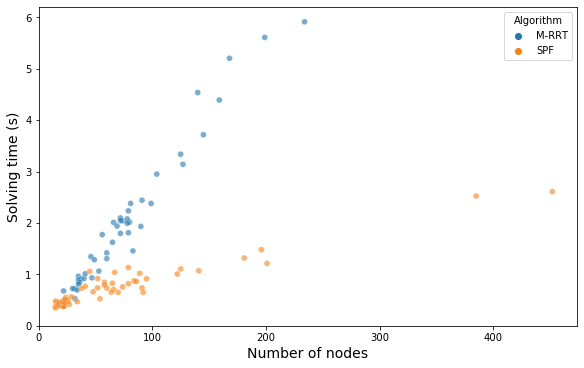

In [477]:
benchmark = "baxter-manipulation-boxes"
x_axis=numnodecol
y_axis=timecol

fig = plt.figure(figsize=(8,5), constrained_layout=True)
ax = fig.add_subplot(111)
sns.scatterplot(data = combined_df, x=x_axis, y=y_axis, 
                ax=ax, hue="Algorithm", alpha=0.6, legend="auto")
ax.set_xlabel(x_axis, fontsize=14)
ax.set_ylabel(y_axis, fontsize=14)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-scatter.png", dpi=200)

# baxter-manipulation-boxes-crossed

In [493]:
combined_df = pd.read_csv("baxter-manipulation-boxes/benchmark.csv")
combined_df = pd.DataFrame(pd.concat([combined_df], axis=0, keys=["M-RRT"]))
combined_df.index.set_names(["Algorithm", "Run"], inplace=True)
combined_df.reset_index(inplace=True)
combined_df

,Algorithm,Run,Solving time (s),Number of nodes
0,M-RRT,0,4.687754,118
1,M-RRT,1,16.195822,338
2,M-RRT,2,2.387466,65
3,M-RRT,3,7.534943,166
4,M-RRT,4,3.794489,93
5,M-RRT,5,5.636021,125
6,M-RRT,6,2.888549,63
7,M-RRT,7,3.872391,92
8,M-RRT,8,13.137780,253
9,M-RRT,9,8.627565,184


In [494]:
print(combined_df[timecol].describe().apply("{0:.2f}".format))
print(combined_df[numnodecol].describe().apply("{0:.2f}".format))

count    50.00
mean      6.62
std       5.35
min       0.46
25%       2.92
50%       5.21
75%       7.80
max      24.18
Name: Solving time (s), dtype: object
count     50.00
mean     146.32
std      121.61
min       17.00
25%       57.75
50%      114.50
75%      180.75
max      568.00
Name: Number of nodes, dtype: object


In [495]:
mrrt = combined_df[combined_df["Algorithm"]=="M-RRT"][numnodecol].describe()
mrrt_minnode = "{:.2f}".format(mrrt.loc["min"])
mrrt_mednode = "{:.2f}".format(mrrt.loc["50%"])
mrrt_maxnode = "{:.2f}".format(mrrt.loc["max"])

spf = combined_df[combined_df["Algorithm"]=="SPF"][numnodecol].describe()
spf_minnode = "{:.2f}".format(spf.loc["min"])
spf_mednode = "{:.2f}".format(spf.loc["50%"])
spf_maxnode = "{:.2f}".format(spf.loc["max"])

mrrt = combined_df[combined_df["Algorithm"]=="M-RRT"][timecol].describe()
mrrt_mintime = "{:.2f}".format(mrrt.loc["min"])
mrrt_medtime = "{:.2f}".format(mrrt.loc["50%"])
mrrt_maxtime = "{:.2f}".format(mrrt.loc["max"])

spf = combined_df[combined_df["Algorithm"]=="SPF"][timecol].describe()
spf_mintime = "{:.2f}".format(spf.loc["min"])
spf_medtime = "{:.2f}".format(spf.loc["50%"])
spf_maxtime = "{:.2f}".format(spf.loc["max"])

mrrt_success = mrrt.loc["count"]/50*100
spf_success = spf.loc["count"]/50*100

nodecolor = "red" if float(mrrt_mednode) < float(spf_mednode) else "teal"
timecolor = "red" if float(mrrt_medtime) < float(spf_medtime) else "teal"
successcolor = "red" if float(mrrt_success) < float(spf_success) else "black"

print(benchmark)
print("\\begin{table}\n"+
"  \\begin{tabular}{l|ccc|ccc|l}\n"+
"    \hline\n"+
"    \multirow{2}{5em}{Algorithm} & \multicolumn{3}{c|}{Solving time (s)} & \multicolumn{3}{c|}{Number of nodes} & \multirow{2}{5em} {Success \%} \\\\\n"+
"    & Min & Median & Max & Min & Median & Max & \\\\ \n"+
"    \hline\n"+
f"    M-RRT & {mrrt_mintime} & {mrrt_medtime} & {mrrt_maxtime} & {mrrt_minnode} & {mrrt_mednode} & {mrrt_maxnode} & \\textcolor{{{successcolor}}}{{{mrrt_success}}} \\\\\n"+
"    \hline\n"+
"  \end{tabular}\n"+
"\end{table}")

baxter-manipulation-boxes
\begin{table}
  \begin{tabular}{l|ccc|ccc|l}
    \hline
    \multirow{2}{5em}{Algorithm} & \multicolumn{3}{c|}{Solving time (s)} & \multicolumn{3}{c|}{Number of nodes} & \multirow{2}{5em} {Success \%} \\
    & Min & Median & Max & Min & Median & Max & \\ 
    \hline
    M-RRT & 0.46 & 5.21 & 24.18 & 17.00 & 114.50 & 568.00 & \textcolor{black}{100.0} \\
    \hline
  \end{tabular}
\end{table}


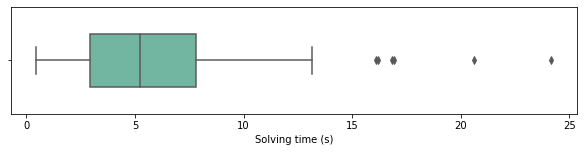

In [496]:
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, x = timecol, orient="h", width=0.5, palette="Set2", ax=ax)
plt.show()
fig.savefig("baxter-manipulation-boxes-crossed-goalconstraint-time.png", dpi=200)

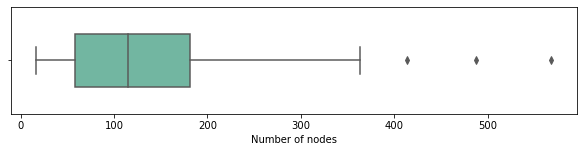

In [497]:
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, x = numnodecol, orient="h", width=0.5, palette="Set2", ax=ax)
plt.show()
fig.savefig("baxter-manipulation-boxes-crossed-goalconstraint-numnode.png", dpi=200)

# baxter-manipulation-boxes-combined

In [514]:
name = "baxter-manipulation-boxes-combined"

benchmark = "baxter-manipulation-boxes"
df = pd.read_csv(f"{benchmark}/benchmark_correctgraph.csv")
df2 = pd.read_csv(f"{benchmark}/benchmark.csv")
df1 = pd.read_csv(f"{benchmark}-spf/benchmark.csv")

combined_df = pd.DataFrame(pd.concat([df, df1, df2], axis=0, keys=["M-RRT", "SPF", "M-RRTc"]))
combined_df.index.set_names(["Algorithm", "Run"], inplace=True)
combined_df.reset_index(inplace=True)
combined_df

,Algorithm,Run,Solving time (s),Number of nodes
0,M-RRT,0,0.962232,35
1,M-RRT,1,0.393035,23
2,M-RRT,2,1.455617,83
3,M-RRT,3,5.911366,234
4,M-RRT,4,2.016348,80
...,...,...,...,...
145,M-RRTc,45,1.948508,37
146,M-RRTc,46,1.576546,29
147,M-RRTc,47,2.663664,56
148,M-RRTc,48,4.574304,107


In [516]:
mrrt = combined_df[combined_df["Algorithm"]=="M-RRT"][numnodecol].describe()
mrrt_minnode = "{:.2f}".format(mrrt.loc["min"])
mrrt_mednode = "{:.2f}".format(mrrt.loc["50%"])
mrrt_maxnode = "{:.2f}".format(mrrt.loc["max"])

mrrtc = combined_df[combined_df["Algorithm"]=="M-RRTc"][numnodecol].describe()
mrrtc_minnode = "{:.2f}".format(mrrtc.loc["min"])
mrrtc_mednode = "{:.2f}".format(mrrtc.loc["50%"])
mrrtc_maxnode = "{:.2f}".format(mrrtc.loc["max"])

spf = combined_df[combined_df["Algorithm"]=="SPF"][numnodecol].describe()
spf_minnode = "{:.2f}".format(spf.loc["min"])
spf_mednode = "{:.2f}".format(spf.loc["50%"])
spf_maxnode = "{:.2f}".format(spf.loc["max"])

mrrt = combined_df[combined_df["Algorithm"]=="M-RRT"][timecol].describe()
mrrt_mintime = "{:.2f}".format(mrrt.loc["min"])
mrrt_medtime = "{:.2f}".format(mrrt.loc["50%"])
mrrt_maxtime = "{:.2f}".format(mrrt.loc["max"])

mrrtc = combined_df[combined_df["Algorithm"]=="M-RRTc"][timecol].describe()
mrrtc_mintime = "{:.2f}".format(mrrtc.loc["min"])
mrrtc_medtime = "{:.2f}".format(mrrtc.loc["50%"])
mrrtc_maxtime = "{:.2f}".format(mrrtc.loc["max"])

spf = combined_df[combined_df["Algorithm"]=="SPF"][timecol].describe()
spf_mintime = "{:.2f}".format(spf.loc["min"])
spf_medtime = "{:.2f}".format(spf.loc["50%"])
spf_maxtime = "{:.2f}".format(spf.loc["max"])

mrrt_success = mrrt.loc["count"]/50*100
spf_success = spf.loc["count"]/50*100
mrrtc_success = mrrt.loc["count"]/50*100

nodecolor = "red" if float(mrrt_mednode) < float(spf_mednode) else "teal"
timecolor = "red" if float(mrrt_medtime) < float(spf_medtime) else "teal"
successcolor = "red" if float(mrrt_success) < float(spf_success) else "black"

print(benchmark)
print("\\begin{table}\n"+
"  \\begin{tabular}{l|ccc|ccc|l}\n"+
"    \hline\n"+
"    \multirow{2}{5em}{Algorithm} & \multicolumn{3}{c|}{Solving time (s)} & \multicolumn{3}{c|}{Number of nodes} & \multirow{2}{5em} {Success \%} \\\\\n"+
"    & Min & Median & Max & Min & Median & Max & \\\\ \n"+
"    \hline\n"+
f"    M-RRT & {mrrt_mintime} & {mrrt_medtime} & {mrrt_maxtime} & {mrrt_minnode} & {mrrt_mednode} & {mrrt_maxnode} & \\textcolor{{{successcolor}}}{{{mrrt_success}}} \\\\\n"+
"    \hline\n"+
f"    SPF & {spf_mintime} & \\textcolor{{{timecolor}}}{{{spf_medtime}}} & {spf_maxtime} & {spf_minnode} & \\textcolor{{{nodecolor}}}{{{spf_mednode}}} & {spf_maxnode} & {spf_success} \\\\\n"+
"    \hline\n"+
f"    M-RRTc & {mrrtc_mintime} & {mrrtc_medtime} & {mrrtc_maxtime} & {mrrtc_minnode} & {mrrtc_mednode} & {mrrtc_maxnode} & \\textcolor{{{successcolor}}}{{{mrrt_success}}} \\\\\n"+
"    \hline\n"+
"  \end{tabular}\n"+
"\end{table}")

baxter-manipulation-boxes
\begin{table}
  \begin{tabular}{l|ccc|ccc|l}
    \hline
    \multirow{2}{5em}{Algorithm} & \multicolumn{3}{c|}{Solving time (s)} & \multicolumn{3}{c|}{Number of nodes} & \multirow{2}{5em} {Success \%} \\
    & Min & Median & Max & Min & Median & Max & \\ 
    \hline
    M-RRT & 0.39 & 1.70 & 5.91 & 17.00 & 65.50 & 234.00 & \textcolor{black}{100.0} \\
    \hline
    SPF & 0.35 & \textcolor{teal}{0.73} & 2.61 & 15.00 & \textcolor{teal}{56.00} & 452.00 & 100.0 \\
    \hline
    M-RRTc & 0.46 & 5.21 & 24.18 & 17.00 & 114.50 & 568.00 & \textcolor{black}{100.0} \\
    \hline
  \end{tabular}
\end{table}


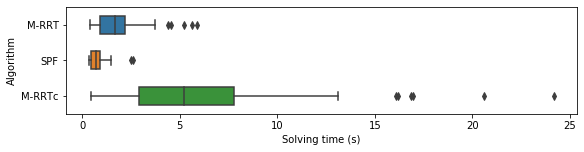

In [517]:
benchmark = "baxter-manipulation-boxes-combined"
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, y = "Algorithm", x = timecol, orient="h", width=0.5, ax=ax)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-time.png", dpi=200)

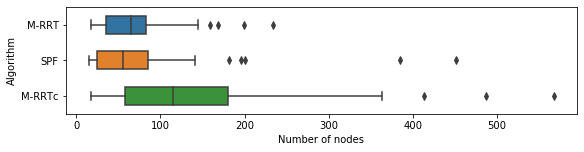

In [518]:
benchmark = "baxter-manipulation-boxes-combined"
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, y = "Algorithm", x = numnodecol, orient="h", width=0.5, ax=ax)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-numnode.png", dpi=200)

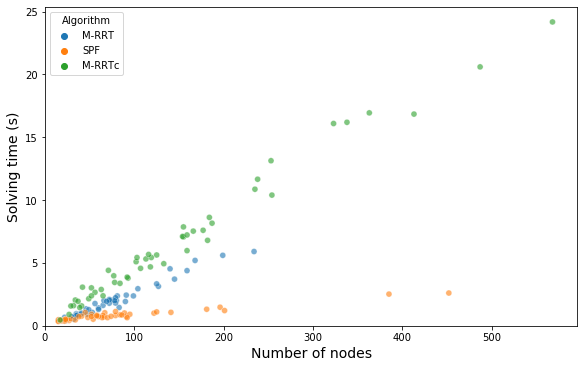

In [519]:
benchmark = "baxter-manipulation-boxes-combined"
x_axis=numnodecol
y_axis=timecol

fig = plt.figure(figsize=(8,5), constrained_layout=True)
ax = fig.add_subplot(111)
sns.scatterplot(data = combined_df, x=x_axis, y=y_axis, 
                ax=ax, hue="Algorithm", alpha=0.6, legend="auto")
ax.set_xlabel(x_axis, fontsize=14)
ax.set_ylabel(y_axis, fontsize=14)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-scatter.png", dpi=200)

# ur3-spheres

In [544]:
benchmark = "ur3-spheres"
df = pd.read_csv(f"{benchmark}/benchmark.csv") 
df1 = pd.read_csv(f"{benchmark}-spf/benchmark.csv")

combined_df = pd.DataFrame(pd.concat([df, df1], axis=0, keys=["M-RRT", "SPF"]))
combined_df.index.set_names(["Algorithm", "Run"], inplace=True)
combined_df.reset_index(inplace=True)
combined_df

,Algorithm,Run,Solving time (s),Number of nodes
0,M-RRT,0,3.803815,130
1,M-RRT,1,26.920062,714
2,M-RRT,2,2.731345,77
3,M-RRT,3,0.362353,16
4,M-RRT,4,0.919066,40
...,...,...,...,...
93,SPF,45,0.472254,26
94,SPF,46,0.572275,29
95,SPF,47,1.407387,326
96,SPF,48,0.417382,23


In [545]:
print("M-RRT:")
print(combined_df[combined_df["Algorithm"]=="M-RRT"][timecol].describe().apply("{0:.2f}".format))
print()
print("SPF:")
print(combined_df[combined_df["Algorithm"]=="SPF"][timecol].describe().apply("{0:.2f}".format))

M-RRT:
count    48.00
mean     10.85
std      10.84
min       0.22
25%       2.67
50%       6.20
75%      15.95
max      45.46
Name: Solving time (s), dtype: object

SPF:
count    50.00
mean      1.10
std       1.35
min       0.40
25%       0.47
50%       0.56
75%       0.65
max       6.37
Name: Solving time (s), dtype: object


In [546]:
print("M-RRT:")
print(combined_df[combined_df["Algorithm"]=="M-RRT"][numnodecol].describe().apply("{0:.2f}".format))
print()
print("SPF:")
print(combined_df[combined_df["Algorithm"]=="SPF"][numnodecol].describe().apply("{0:.2f}".format))

M-RRT:
count      48.00
mean      298.02
std       274.04
min        16.00
25%        83.75
50%       185.50
75%       419.75
max      1121.00
Name: Number of nodes, dtype: object

SPF:
count     50.00
mean      75.54
std       89.44
min       23.00
25%       25.00
50%       30.00
75%       72.50
max      387.00
Name: Number of nodes, dtype: object


In [547]:
mrrt = combined_df[combined_df["Algorithm"]=="M-RRT"][numnodecol].describe()
mrrt_minnode = "{:.2f}".format(mrrt.loc["min"])
mrrt_mednode = "{:.2f}".format(mrrt.loc["50%"])
mrrt_maxnode = "{:.2f}".format(mrrt.loc["max"])

spf = combined_df[combined_df["Algorithm"]=="SPF"][numnodecol].describe()
spf_minnode = "{:.2f}".format(spf.loc["min"])
spf_mednode = "{:.2f}".format(spf.loc["50%"])
spf_maxnode = "{:.2f}".format(spf.loc["max"])

mrrt = combined_df[combined_df["Algorithm"]=="M-RRT"][timecol].describe()
mrrt_mintime = "{:.2f}".format(mrrt.loc["min"])
mrrt_medtime = "{:.2f}".format(mrrt.loc["50%"])
mrrt_maxtime = "{:.2f}".format(mrrt.loc["max"])

spf = combined_df[combined_df["Algorithm"]=="SPF"][timecol].describe()
spf_mintime = "{:.2f}".format(spf.loc["min"])
spf_medtime = "{:.2f}".format(spf.loc["50%"])
spf_maxtime = "{:.2f}".format(spf.loc["max"])

mrrt_success = mrrt.loc["count"]/50*100
spf_success = spf.loc["count"]/50*100

nodecolor = "red" if float(mrrt_mednode) < float(spf_mednode) else "teal"
timecolor = "red" if float(mrrt_medtime) < float(spf_medtime) else "teal"
successcolor = "red" if float(mrrt_success) < float(spf_success) else "black"

print("\\begin{table}\n"+
"  \\begin{tabular}{l|ccc|ccc|l}\n"+
"    \hline\n"+
"    \multirow{2}{5em}{Algorithm} & \multicolumn{3}{c|}{Solving time (s)} & \multicolumn{3}{c|}{Number of nodes} & \multirow{2}{5em} {Success \%} \\\\\n"+
"    & Min & Median & Max & Min & Median & Max & \\\\ \n"+
"    \hline\n"+
f"    M-RRT & {mrrt_mintime} & {mrrt_medtime} & {mrrt_maxtime} & {mrrt_minnode} & {mrrt_mednode} & {mrrt_maxnode} & \\textcolor{{{successcolor}}}{{{mrrt_success}}} \\\\\n"+
"    \hline\n"+
f"    SPF & {spf_mintime} & \\textcolor{{{timecolor}}}{{{spf_medtime}}} & {spf_maxtime} & {spf_minnode} & \\textcolor{{{nodecolor}}}{{{spf_mednode}}} & {spf_maxnode} & {spf_success} \\\\\n"+
"    \hline\n"+
"  \end{tabular}\n"+
"\end{table}")

\begin{table}
  \begin{tabular}{l|ccc|ccc|l}
    \hline
    \multirow{2}{5em}{Algorithm} & \multicolumn{3}{c|}{Solving time (s)} & \multicolumn{3}{c|}{Number of nodes} & \multirow{2}{5em} {Success \%} \\
    & Min & Median & Max & Min & Median & Max & \\ 
    \hline
    M-RRT & 0.22 & 6.20 & 45.46 & 16.00 & 185.50 & 1121.00 & \textcolor{red}{96.0} \\
    \hline
    SPF & 0.40 & \textcolor{teal}{0.56} & 6.37 & 23.00 & \textcolor{teal}{30.00} & 387.00 & 100.0 \\
    \hline
  \end{tabular}
\end{table}


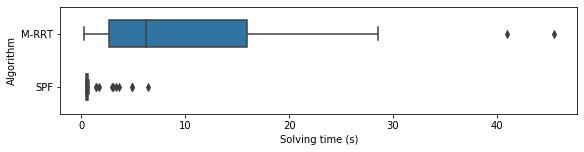

In [548]:
benchmark = "ur3-spheres"
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, y = "Algorithm", x = timecol, orient="h", width=0.5, ax=ax)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-time.png", dpi=200)

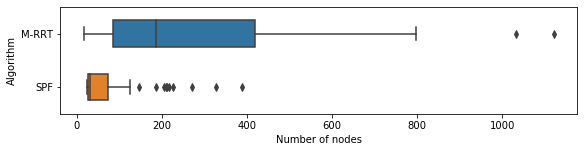

In [549]:
benchmark = "ur3-spheres"
fig = plt.figure(figsize=(8,2), constrained_layout=True)
ax = fig.add_subplot(111)
sns.boxplot(data=combined_df, y = "Algorithm", x = numnodecol, orient="h", width=0.5, ax=ax)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-numnode.png", dpi=200)

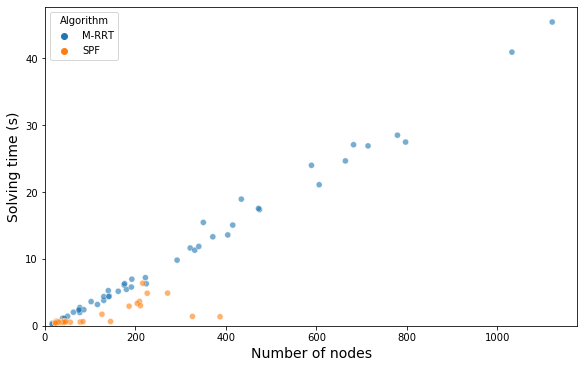

In [550]:
benchmark = "ur3-spheres"
x_axis=numnodecol
y_axis=timecol

fig = plt.figure(figsize=(8,5), constrained_layout=True)
ax = fig.add_subplot(111)
sns.scatterplot(data = combined_df, x=x_axis, y=y_axis, 
                ax=ax, hue="Algorithm", alpha=0.6, legend="auto")
ax.set_xlabel(x_axis, fontsize=14)
ax.set_ylabel(y_axis, fontsize=14)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
plt.show()
fig.savefig(f"{benchmark}-goalconfig-scatter.png", dpi=200)

# construction-set-biggraph

In [ ]:
benchmark = "construction-set"
df1 = pd.read_csv(f"{benchmark}-spf/benchmark_biggraph.csv")

combined_df = pd.DataFrame(pd.concat([df, df1], axis=0, keys=["M-RRT", "SPF"]))
combined_df.index.set_names(["Algorithm", "Run"], inplace=True)
combined_df.reset_index(inplace=True)
combined_df